In [102]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Input
from keras.models import Model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from keras.optimizers import SGD, Adam

In [103]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")

vueltas.drop(['Piloto'], axis = 1, inplace = True)

In [104]:
vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

In [105]:
vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)

In [106]:
vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [107]:
vueltas_test

,LapTime,LapNumber,TyreLife,FreshTyre,TrackStatus,Stint,makeStop,AirTemp,Rainfall,Humidity,TrackTemp,posicionActual,tiempoPilotoDelante,tiempoPilotoDetras,posicionSalida,nextPit,compound_HARD,compound_MEDIUM,compound_SOFT,compound_SUPERSOFT
4077,87.509,2.0,5.0,0.0,1.0,1.0,0.0,36.7,0.0,7.0,49.4,2.0,87.627,87.831,2.0,13.0,0.0,0.0,1.0,0.0
4078,87.574,3.0,6.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.4,2.0,87.198,87.009,2.0,13.0,0.0,0.0,1.0,0.0
4079,87.601,4.0,7.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.5,2.0,87.671,88.177,2.0,13.0,0.0,0.0,1.0,0.0
4080,87.937,5.0,8.0,0.0,1.0,1.0,0.0,37.0,0.0,6.0,49.3,2.0,87.891,88.503,2.0,13.0,0.0,0.0,1.0,0.0
4081,87.761,6.0,9.0,0.0,1.0,1.0,0.0,36.9,0.0,6.0,49.5,2.0,87.427,88.655,2.0,13.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,87.021,23.0,2.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.5,1.0,90.757,88.555,1.0,27.0,0.0,1.0,0.0,0.0
5147,87.196,24.0,3.0,1.0,1.0,2.0,0.0,37.1,0.0,6.0,49.4,1.0,90.558,89.588,1.0,27.0,0.0,1.0,0.0,0.0
5148,87.003,25.0,4.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,92.489,88.079,1.0,27.0,0.0,1.0,0.0,0.0
5149,87.279,26.0,5.0,1.0,1.0,2.0,0.0,37.0,0.0,6.0,49.4,1.0,108.293,88.687,1.0,27.0,0.0,1.0,0.0,0.0


In [108]:
vueltas_test.shape

(1074, 20)

In [109]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)


In [110]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    valor = vueltas_train_scaler[i + future - 1:i + future, 6]
    val = valor[0]
    if val == 0.0:
        trainY.append(val)
    else:
        trainY.append(val)                                 
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]])
    valor = vueltas_test_scaler[i + future - 1:i + future, 6]
    val = valor[0]
    if val == 0.0:
        testY.append(val)
    else:
        testY.append(val)    
                                




In [111]:
trainY

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [112]:
testY

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0

In [113]:
trainX, trainY, testX, testY = np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [114]:
trainX.shape

(4067, 10, 20)

In [115]:
trainY.shape

(4067,)

In [116]:
testX.shape

(1064, 10, 20)

In [117]:
testY.shape

(1064,)

In [126]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 10, 256)           283648    
                                                                 
 dropout_13 (Dropout)        (None, 10, 256)           0         
                                                                 
 lstm_19 (LSTM)              (None, 128)               197120    
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 480,897
Trainable params: 480,897
Non-trainable params: 0
_________________________________________________________________


Epoch 1/12
58/58 [==============================] - 5s 54ms/step - loss: 0.1765 - val_loss: 0.1652
Epoch 2/12
58/58 [==============================] - 3s 47ms/step - loss: 0.1031 - val_loss: 0.1223
Epoch 3/12
58/58 [==============================] - 3s 45ms/step - loss: 0.0976 - val_loss: 0.1621
Epoch 4/12
58/58 [==============================] - 3s 50ms/step - loss: 0.0898 - val_loss: 0.1188
Epoch 5/12
58/58 [==============================] - 3s 46ms/step - loss: 0.0841 - val_loss: 0.1866
Epoch 6/12
58/58 [==============================] - 3s 45ms/step - loss: 0.0827 - val_loss: 0.0974
Epoch 7/12
58/58 [==============================] - 3s 45ms/step - loss: 0.0801 - val_loss: 0.1169
Epoch 8/12
58/58 [==============================] - 3s 46ms/step - loss: 0.0755 - val_loss: 0.0981
Epoch 9/12
58/58 [==============================] - 3s 45ms/step - loss: 0.0751 - val_loss: 0.0984
Epoch 10/12
58/58 [==============================] - 3s 48ms/step - loss: 0.0827 - val_loss: 0.1641
Epoch 11/

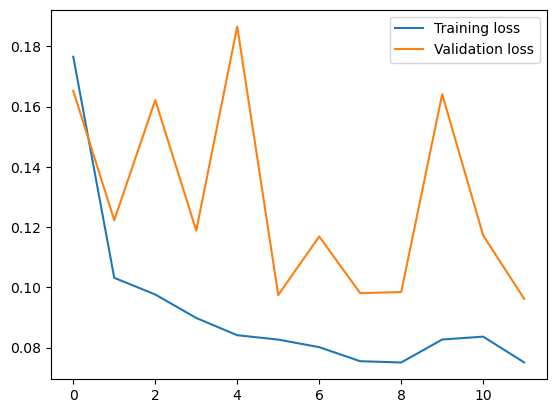

In [127]:
history = model.fit(trainX, trainY, epochs=12, batch_size=64, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [133]:
prediction = model.predict(testX[2:3]) 
prediction

1/1 [==============================] - 0s 22ms/step


array([[6.516577e-08]], dtype=float32)

In [138]:
predictions = model.predict(testX)
sum(predictions[:,0] == 1)

34/34 [==============================] - 0s 9ms/step


0

In [135]:
testY[2]

1.0

### Sacar métricas de lo que falla. Con el unique, ver a cual se acerca más. Sacar matrix_confusion, con este modelo.

### Ahora vamos a sacar todas las Y^ y todas las y.

In [107]:
y_real = testY.tolist()

In [108]:
y_pred = []
for i in range (0, len(y_real)):
    prediction = model.predict(testX[i:i+1])     
    valor = prediction[0][0].item()
    y_pred.append(valor)
    print(valor)

1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 19ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 50ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 25ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 25ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 22ms/s

1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 26ms/step
0.0
1/1 [==============================] - 0s 26ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 22ms/s

1/1 [==============================] - 0s 51ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 25ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 25ms/step
0.0
1/1 [==============================] - 0s 23ms/s

1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 26ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 24ms/step
0.0
1/1 [==============================] - 0s 23ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 25ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 21ms/step
0.0
1/1 [==============================] - 0s 20ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 22ms/step
0.0
1/1 [==============================] - 0s 23ms/s

In [289]:
print(len(y_real), len(y_pred))

1064 1064


In [290]:
uniques = set(tuple(x) for x in y_real)
uniques = [list(x) for x in uniques]

In [291]:
uniques

[[0.0], [1.0], [0.6666666666666667], [0.3333333333333333]]

In [292]:
y_pred_normalized = []
for val in y_pred:
    dist = [abs(val-x[0]) for x in uniques]
    closest_val = uniques[np.argmin(dist)][0]
    y_pred_normalized.append(closest_val)


In [293]:
bien_predecidas = 0
mal_predecidas = 0

for i in range (0, len(y_real)):
    if y_pred_normalized[i] == y_real[i][0]:
        bien_predecidas += 1
    else:
        mal_predecidas += 1

precision = bien_predecidas/(mal_predecidas+bien_predecidas)      

In [294]:
print("El modelo tiene una precision de: ", precision)

El modelo tiene una precision de:  0.7800751879699248
